In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [18]:
trainData = pd.read_csv('../input/train.csv',index_col='ID_code')

In [19]:
total = trainData.isnull().sum().sort_values(ascending=False)
percent = (trainData.isnull().sum()/trainData.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
var_199,0,0.0
var_61,0,0.0
var_71,0,0.0
var_70,0,0.0
var_69,0,0.0


In [20]:
model = RandomForestClassifier(random_state=1, max_depth=10,n_estimators=20)

In [21]:
X = trainData.drop(['target'],axis=1)

y = trainData['target']

model.fit(X,y)




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [22]:

features = X.columns

importances = model.feature_importances_

indices = np.argsort(importances)[-20:]

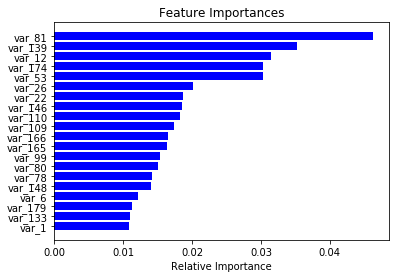

In [23]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Trying correlation amongst the filtered features and testing linearity between variables

In [24]:
filteredFeatures = [features[i] for i in np.argsort(importances)[-100:]]

In [25]:
Xfinal = trainData.filter(filteredFeatures,axis=1)

In [26]:
y = trainData['target']

In [27]:
def plotCorrelation(df):
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

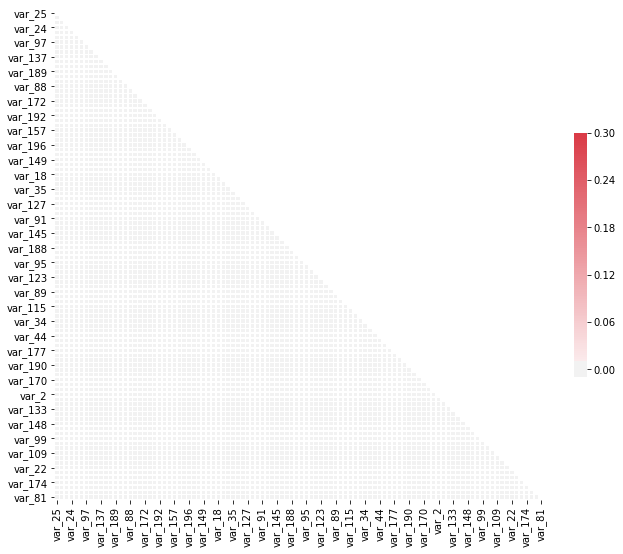

In [28]:
plotCorrelation(Xfinal)

In [29]:
Xfinal.corr()

,var_25,var_130,var_180,var_24,var_194,var_143,var_97,var_187,var_155,var_137,var_50,var_132,var_189,var_43,var_175,var_88,var_106,var_162,var_172,var_82,var_128,var_192,var_163,var_125,var_157,var_134,var_42,var_196,var_131,var_32,var_149,var_119,var_49,var_18,var_197,var_186,var_35,var_36,var_118,var_127,...,var_115,var_94,var_33,var_34,var_40,var_154,var_44,var_108,var_191,var_177,var_92,var_0,var_190,var_21,var_164,var_170,var_198,var_76,var_2,var_13,var_1,var_133,var_179,var_6,var_148,var_78,var_80,var_99,var_165,var_166,var_109,var_110,var_146,var_22,var_26,var_53,var_174,var_12,var_139,var_81
var_25,1.000000,0.006643,0.001713,-0.000578,-0.001059,0.000011,-0.001481,0.000113,0.000906,0.002359,0.000144,-0.001912,0.002217,-0.000993,0.002013,-0.001193,-0.001282,0.001643,-0.001321,0.000146,0.001334,-0.001795,0.001542,0.002247,0.001365,-0.000181,0.000376,0.000008,-0.003541,-0.000054,-0.000692,0.001847,0.000268,-0.000245,0.002041,-0.002515,0.001665,-0.000179,-0.001198,0.000980,...,-0.003278,-0.000710,0.001451,0.002944,0.001220,-0.002674,-0.003420,0.001751,-0.000063,-0.000882,-0.003459,0.001158,0.000538,-0.002080,0.003106,-0.000134,-0.001635,-0.003324,-0.000913,0.000915,0.000844,-0.001338,-0.000845,-0.000391,-0.000683,0.001869,-0.001694,0.000566,0.000536,-0.000720,-0.003624,0.000675,-0.003403,0.003505,0.000047,0.004271,-0.000127,-0.001716,-0.000096,-0.003636
var_130,0.006643,1.000000,0.001426,-0.001004,-0.004692,-0.005268,0.001908,-0.001521,-0.000660,0.001304,0.001344,-0.000579,0.000219,0.000986,0.000408,0.000330,0.002648,-0.000413,-0.004599,0.001760,-0.002482,-0.000045,-0.001153,-0.002262,0.002044,0.003176,0.001217,0.000849,-0.001907,0.003805,-0.005075,-0.000999,0.000282,0.001532,-0.001525,-0.001515,0.001855,-0.001003,0.000970,-0.002399,...,-0.000504,-0.001337,-0.003869,-0.002839,0.004164,0.000594,-0.000862,0.001138,0.001453,-0.004408,-0.002619,0.000864,0.002471,-0.001083,-0.000144,0.002309,-0.001943,-0.000574,0.007084,0.002068,0.001231,-0.000187,0.001532,0.002831,-0.003312,-0.001348,0.000537,0.004240,-0.003211,-0.001981,0.000639,0.003708,0.000414,0.002507,0.003161,0.002458,-0.003702,0.000209,0.000004,0.000986
var_180,0.001713,0.001426,1.000000,0.003982,-0.002509,0.000215,0.000144,0.000448,0.002206,0.007812,0.001781,-0.002635,0.000947,-0.001241,0.000773,-0.004680,0.004316,-0.000767,-0.000718,0.003847,0.000057,-0.002815,-0.001013,0.004568,0.000777,0.006951,-0.000404,0.001153,-0.003197,-0.002735,-0.000161,0.001215,0.002754,0.000780,-0.002536,-0.003476,-0.000291,-0.005537,0.000588,-0.002604,...,-0.000828,0.001418,-0.004870,-0.000329,-0.003217,-0.003055,0.001127,-0.000398,0.006295,-0.000940,0.000679,0.001939,-0.000962,-0.001354,0.000081,0.003043,-0.001624,-0.002102,0.002365,-0.002344,0.003376,0.004358,0.002139,-0.000133,-0.002057,-0.003290,-0.001884,0.000531,-0.004798,-0.001064,-0.003467,0.000829,-0.000266,0.000629,0.004306,-0.000828,-0.002984,-0.003699,-0.001751,-0.002772
var_24,-0.000578,-0.001004,0.003982,1.000000,0.003553,-0.000996,-0.000158,0.001272,-0.001852,-0.001648,0.001246,-0.000410,-0.001064,0.001219,0.001477,0.004060,0.000184,0.001811,0.002721,-0.002315,0.000703,0.003448,0.001046,0.000372,0.005015,-0.003609,0.000881,0.002193,0.001804,-0.004175,0.000676,0.000117,-0.001309,0.001576,0.004293,-0.004352,-0.000035,-0.002020,0.001027,-0.001315,...,-0.000214,-0.002382,-0.000770,-0.000287,0.002321,0.000511,-0.003014,0.000088,-0.000363,-0.002321,-0.002481,0.003658,-0.001664,-0.002836,-0.000332,0.000494,0.001555,-0.000551,0.001693,-0.002171,0.001417,0.002591,0.000421,0.003376,-0.001728,-0.000280,-0.003590,0.005514,-0.003486,-0.003342,-0.006770,0.002266,-0.000863,-0.003863,0.003009,0.002904,-0.001206,0.003404,-0.004322,-0.003716
var_194,-0.001059,-0.004692,-0.002509,0.003553,1.000000,-0.000233,0.001039,-0.000478,0.000828,0.000622,-0.000569,0.002079,-0.001092,-0.000759,-0.001544,0.001751,0.001762,-0.001571,0.001774,-0.000679,-0.001346,0.002084,-0.002657,-0.004827,-0.001050,-0.000911,-0.004277,-0.005040,-0.000207,-0.001545,0.000090,0

In [30]:
Xfinal['var81_139'] = Xfinal['var_81'] + Xfinal['var_139']

In [34]:
Xfinal = Xfinal.drop(['var_81','var_139'],axis=1)

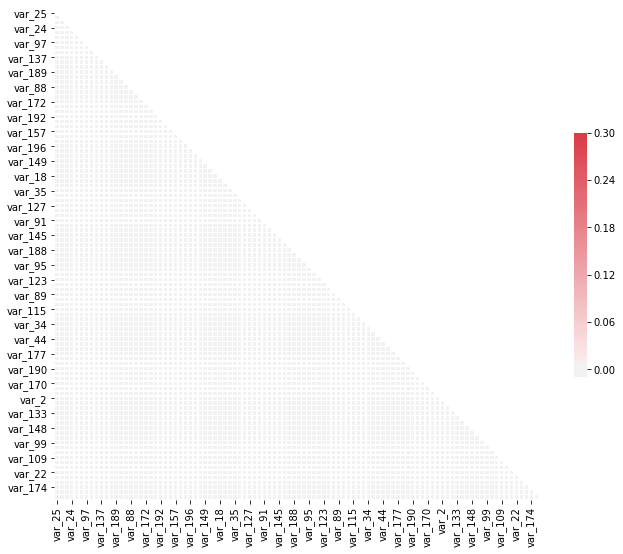

In [35]:
plotCorrelation(Xfinal)